<a href="https://colab.research.google.com/github/varshinihebbal/ElevateLabs_EDA_Task5/blob/main/task5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

--- Data Split ---
Training set size: 717
Testing set size: 308

--- Decision Tree (Full) ---
Full DT Training Accuracy: 1.0000
Full DT Testing Accuracy: 0.9708
Note: If Train Acc >> Test Acc, overfitting is occurring.

--- Decision Tree (Pruned, max_depth=4) ---
Pruned DT Training Accuracy: 0.8968
Pruned DT Testing Accuracy: 0.8344

Decision Tree visualization is ready (stored in 'graph' variable).
--- Model Comparison ---
Pruned DT Test Accuracy: 0.8344
Random Forest Test Accuracy: 0.9805

--- Feature Importances ---
Top 5 Features:
 |         |        0 |
|:--------|---------:|
| cp      | 0.132274 |
| thalach | 0.125039 |
| ca      | 0.122912 |
| oldpeak | 0.122852 |
| thal    | 0.113005 |

Feature importance plot saved as 'feature_importances.png'.

--- Cross-Validation ---
Random Forest 5-Fold CV Scores: [1.     1.     1.     1.     0.9854]
Mean CV Accuracy: 0.9971


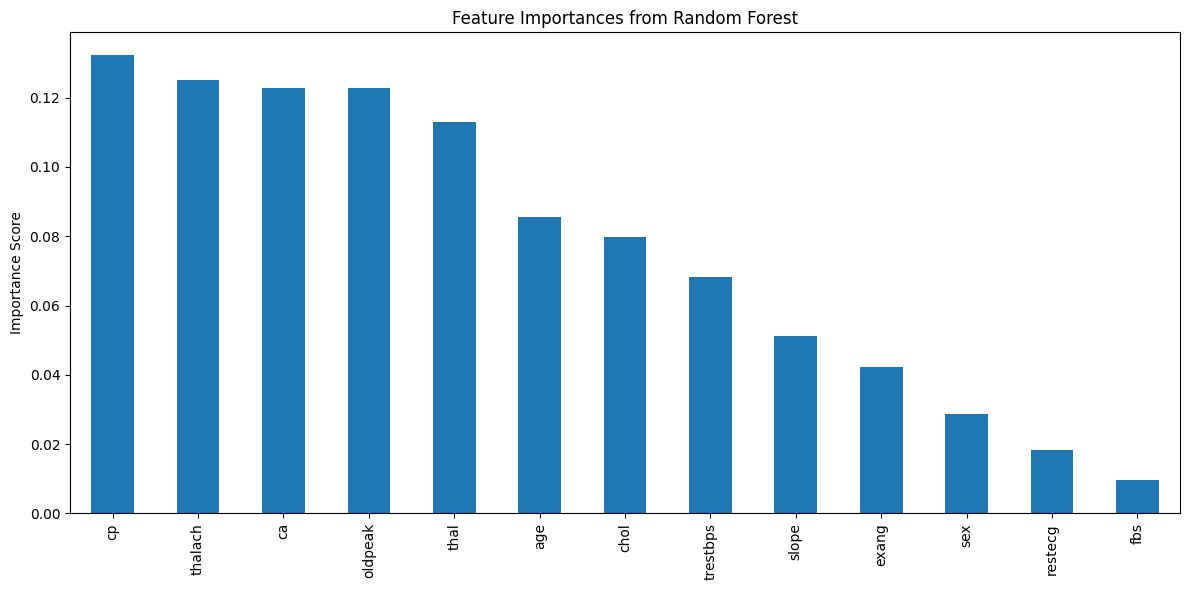

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import graphviz
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# --- STEP 0: Data Loading and Preparation ---
# Load the clean, uploaded dataset
df = pd.read_csv("heart.csv")

# Define Features (X) and Target (y)
# The 'target' column is the classification label
X = df.drop('target', axis=1)
y = df['target']

# Split Data into training (70%) and testing (30%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("--- Data Split ---")
print(f"Training set size: {len(X_train)}")
print(f"Testing set size: {len(X_test)}\n")

# --- STEP 1 & 2: Decision Tree Classifier and Overfitting Analysis ---

# 1a. Train the initial, UNCONSTRAINED (Full) Decision Tree
dt_full = DecisionTreeClassifier(random_state=42)
dt_full.fit(X_train, y_train)

# Evaluate the full tree
train_acc_full = dt_full.score(X_train, y_train)
test_acc_full = dt_full.score(X_test, y_test)
print("--- Decision Tree (Full) ---")
print(f"Full DT Training Accuracy: {train_acc_full:.4f}")
print(f"Full DT Testing Accuracy: {test_acc_full:.4f}")
print("Note: If Train Acc >> Test Acc, overfitting is occurring.\n")

# 1b. Control Tree Depth (Pruning) to prevent overfitting
dt_pruned = DecisionTreeClassifier(max_depth=4, random_state=42)
dt_pruned.fit(X_train, y_train)

# Evaluate the pruned tree
train_acc_pruned = dt_pruned.score(X_train, y_train)
test_acc_pruned = dt_pruned.score(X_test, y_test)
print("--- Decision Tree (Pruned, max_depth=4) ---")
print(f"Pruned DT Training Accuracy: {train_acc_pruned:.4f}")
print(f"Pruned DT Testing Accuracy: {test_acc_pruned:.4f}\n")


# --- STEP 3: Decision Tree Visualization ---

# Generate the Graphviz code for the pruned tree
dot_data = export_graphviz(
    dt_pruned,
    out_file=None,
    feature_names=X.columns,
    class_names=['No Disease', 'Disease'],
    filled=True,
    rounded=True,
    special_characters=True
)

# Render and display the visualization
graph = graphviz.Source(dot_data)
# graph # Uncomment this line in Colab to display the image.
print("Decision Tree visualization is ready (stored in 'graph' variable).")


# --- STEP 4: Random Forest Implementation and Comparison ---

# Train a Random Forest Classifier (Ensemble Model)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Evaluate Random Forest
y_pred_rf = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_pred_rf)

print("--- Model Comparison ---")
print(f"Pruned DT Test Accuracy: {test_acc_pruned:.4f}")
print(f"Random Forest Test Accuracy: {rf_accuracy:.4f}\n")


# --- STEP 5: Interpretation and Cross-Validation ---

# 5a. Interpret Feature Importances (from Random Forest)
importances = rf_model.feature_importances_
feature_importances = pd.Series(importances, index=X.columns).sort_values(ascending=False)

print("--- Feature Importances ---")
print("Top 5 Features:\n", feature_importances.head().to_markdown())

# Plot the importances
plt.figure(figsize=(12, 6))
feature_importances.plot(kind='bar')
plt.title('Feature Importances from Random Forest')
plt.ylabel('Importance Score')
plt.tight_layout()
plt.savefig('feature_importances.png')
# plt.show() # Uncomment this line in Colab to display the plot immediately.
print("\nFeature importance plot saved as 'feature_importances.png'.")

# 5b. Evaluate using Cross-Validation (5-fold CV)
cv_scores = cross_val_score(rf_model, X, y, cv=5, scoring='accuracy')

print("\n--- Cross-Validation ---")
print(f"Random Forest 5-Fold CV Scores: {cv_scores.round(4)}")
print(f"Mean CV Accuracy: {cv_scores.mean():.4f}")